In [0]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## functions

In [0]:
# normalization function function (excl_col - columns to exclude, verd - to plot or not)
def my_norm(x, excl_cols=[], verb=True):
    x_norm = x.copy().astype(float)
    for i in ([i for i in range(x_norm.shape[0]) if i not in excl_cols]):
        print(f'min max for col {i}: {x[i].min(), x[i].max()}')
        x_norm[i] = (x[i] - x[i].min()) / (x[i].max() - x[i].min())
        if verb==True:
            plt.hist(x[i])
            plt.pause(0.05)

    return x_norm

# standartization function (excl_col - columns to exclude, verd - to plot or not)
def my_stnd(x, excl_cols=[], verb=True):
    x_std = x.copy().astype(float)
    for i in ([i for i in range(x_std.shape[0]) if i not in excl_cols]):
        print(f'mean, std for col {i}: {x[i].mean(), x[i].std()}')
        if verb==True:
            plt.hist(x[i])
            plt.pause(0.05)
        x_std[i] = (x[i] - x[i].mean()) / x[i].std()
        if verb==True:
            plt.hist(x_std[i])
            plt.pause(0.05)

    return x_std

# mean absoulute error
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

# mean squarred error
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

# calc weights by gradient descent
def eval_model(x, y, iterations, alpha=1e-4):
    w = np.random.randn(x.shape[0])
    for i in range(1, iterations+1):
        y_pred = np.dot(w, x)
        err = calc_mse(y, y_pred)
        w -= (alpha * (1/x.shape[1] * 2 * np.dot((y_pred - y), x.T)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

# calc weights by stochastic gradient descent
def eval_sgd_model(x, y, iterations, qty_in_batch, alpha=1e-4):
    w = np.random.randn(x.shape[0])
    n_batch = x.shape[1] // qty_in_batch
    if x.shape[1] % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for batch in range(n_batch):
            start_ = qty_in_batch*batch
            end_ = qty_in_batch*(batch+1)
        
        # print(batch, n_batch, start_, end_)
        
            x_tmp = x[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(w, x_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= (alpha * (1/x.shape[1] * 2 * np.dot((y_pred_tmp - y_tmp), x_tmp.T)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    
    return w

# l1 regularization 
# f(x, w) + (lambda_/2) * np.sum(np.abs(w))
def eval_model_reg1(x, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(x.shape[0])
    for i in range(1, iterations+1):
        y_pred = np.dot(w, x)
        err = calc_mae(y, y_pred)
        w -= alpha * (1/x.shape[1] * 2 * np.dot((y_pred - y), x.T) + lambda_ * w) 
        if i % (iterations / 10) == 0:
            print(i, w, err)

    return w

# l2 regularization 
# f(x, w) + (lambda_/2) * np.sum(w**2)
def eval_model_reg2(x, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(x.shape[0])
    for i in range(1, iterations+1):
        y_pred = np.dot(w, x)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/x.shape[1] * 2 * np.dot((y_pred - y), x.T) + lambda_ * w) 
        if i % (iterations / 10) == 0:
            print(i, w, err)

    return w

## data upload

In [0]:
x = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

## preprocessing

In [14]:
# normalization 
my_norm(x, excl_cols=[0,3], verb=False)

min max for col 1: (0, 10)
min max for col 2: (450, 2000)


array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

In [19]:
# standartization

my_stnd(x, [0], verb=False)[0:3]

mean, std for col 1: (2.6, 2.8000000000000003)
mean, std for col 2: (975.0, 484.8968962573384)
mean, std for col 3: (1.7, 0.7810249675906655)


array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]])

mean, std for col 1: (2.6, 2.8000000000000003)


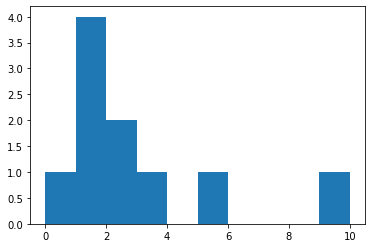

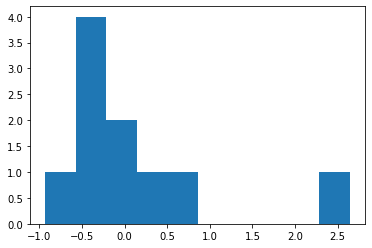

mean, std for col 2: (975.0, 484.8968962573384)


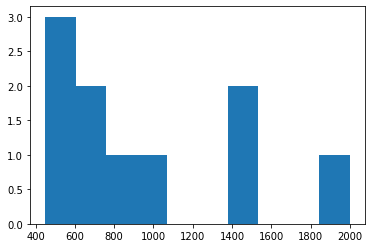

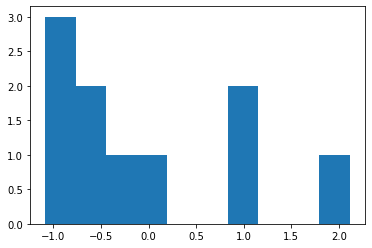

mean, std for col 3: (1.7, 0.7810249675906655)


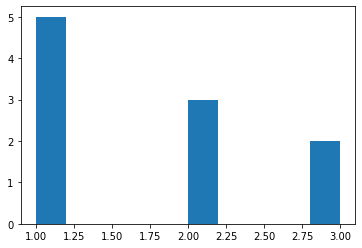

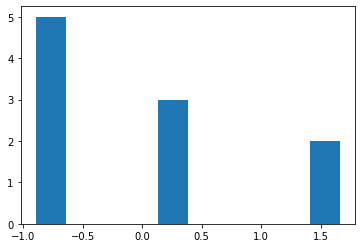

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [20]:
my_stnd(x,excl_cols=[0])

In [21]:
# GD
eval_model(my_stnd(x, [0], verb=False)[0:3], y, iterations=1000, alpha=1e-2)

mean, std for col 1: (2.6, 2.8000000000000003)
mean, std for col 2: (975.0, 484.8968962573384)
mean, std for col 3: (1.7, 0.7810249675906655)
100 [49.75262874  5.08993876  6.02735258] 104.8372494405259
200 [56.38580902  5.58137395  5.75363927] 44.66926428931885
300 [57.26549844  5.89820489  5.44131   ] 43.4179483011302
400 [57.38216246  6.15692185  5.18268612] 43.264800816775086
500 [57.39763439  6.36962026  4.96998964] 43.17343956173872
600 [57.39968627  6.54451544  4.7950945 ] 43.111881696116946
700 [57.39995839  6.68832684  4.6512831 ] 43.07026426766119
800 [57.39999448  6.80657892  4.53303102] 43.042125488984595
900 [57.39999927  6.90381431  4.43579564] 43.023099981837404
1000 [57.3999999   6.98376824  4.3558417 ] 43.01023624144636


array([57.3999999 ,  6.98376824,  4.3558417 ])

In [22]:
# SGD
eval_sgd_model(my_stnd(x, [0], verb=False), y, iterations=5000, qty_in_batch=5, alpha=1e-2)

mean, std for col 1: (2.6, 2.8000000000000003)
mean, std for col 2: (975.0, 484.8968962573384)
mean, std for col 3: (1.7, 0.7810249675906655)
500 [57.39600376  5.6141731   2.3466437   3.71928984] 41.1899462745533
1000 [57.39807256  5.92306486  1.79550162  3.96756044] 39.423034884714504
1500 [57.39790547  6.05267228  1.57254183  4.06332083] 38.73485734649362
2000 [57.39783677  6.10629764  1.48223949  4.1009638 ] 38.46215964223638
2500 [57.39780869  6.12830768  1.44564015  4.11594236] 38.35288788923384
3000 [57.39779724  6.13729916  1.43080033  4.12194798] 38.30885065402753
3500 [57.39779258  6.14096216  1.42478176  4.12436721] 38.29104999123372
4000 [57.39779069  6.14245195  1.42234045  4.12534451] 38.28384299300039
4500 [57.39778992  6.14305727  1.42135009  4.12574   ] 38.28092247279902
5000 [57.39778961  6.14330308  1.42094832  4.1259002 ] 38.27973838327938


array([57.39778961,  6.14330308,  1.42094832,  4.1259002 ])

In [23]:
#l2 regularization
eval_model_reg2(my_stnd(x, [0], verb=False), y, iterations=5000, alpha=1e-2, lambda_=1e-4)

mean, std for col 1: (2.6, 2.8000000000000003)
mean, std for col 2: (975.0, 484.8968962573384)
mean, std for col 3: (1.7, 0.7810249675906655)
500 [57.39479705  5.10767868  2.46037345  4.08674902] 39.98166412253417
1000 [57.39713005  5.765859    1.85689028  4.03893236] 39.807231204063974
1500 [57.39713014  5.99060723  1.60529698  4.06885866] 39.78240504280037
2000 [57.39713014  6.07152025  1.50155606  4.09300748] 39.7785235657889
2500 [57.39713014  6.10185559  1.45905205  4.10572941] 39.77788748617128
3000 [57.39713014  6.11355928  1.44170275  4.11160375] 39.77777930470261
3500 [57.39713014  6.11816175  1.43463681  4.11416107] 39.77775983405893
4000 [57.39713014  6.11999396  1.43176283  4.1152412 ] 39.777755943216036
4500 [57.39713014  6.12072893  1.43059479  4.11568989] 39.77775502451415
5000 [57.39713014  6.12102515  1.4301203   4.11587451] 39.777754760507676


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

#  1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [0]:
# не успел

#  2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

насколько я понял, нормализацию можно рассмотреть как частный случай стандартизации. выбор зависит от предположения о наличия нормального распределения признака. нормализация подходит для случаев неизвестного распределения признака, либо распределения отличного от гауссовского, нормализация - обратно - эффективна при предположении о нормальном распределения признаков. смысл применять сразу и то и другое не вижу, но на всякий случай попробовал для нашего случая - ничего ужасного не произошло. поэтому отвечая на вопрос, можно ли - эмпирически - да, возможно, но только стандартизирую уже нормализованные признаки

In [39]:
eval_model_reg1(
    my_stnd(
        my_norm(
            x, 
            excl_cols=[0], 
            verb=False
        ),
        excl_cols=[0],
        verb=False
    ),
    y,
    iterations=50000, 
    alpha=1e-2, 
    lambda_=1e-3
)

min max for col 1: (0, 10)
min max for col 2: (450, 2000)
min max for col 3: (1, 3)
mean, std for col 1: (0.26, 0.27999999999999997)
mean, std for col 2: (0.33870967741935487, 0.312836707262799)
mean, std for col 3: (0.35, 0.39051248379533277)
5000 [57.37131434  6.11038803  1.44200443  4.11257825] 5.36036323005416
10000 [57.37131434  6.11057948  1.44169584  4.11269953] 5.360385944743458
15000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366511
20000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807
25000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807
30000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807
35000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807
40000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807
45000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807
50000 [57.37131434  6.1105795   1.44169581  4.11269955] 5.360385947366807


array([57.37131434,  6.1105795 ,  1.44169581,  4.11269955])

#  3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [27]:
# mean absoulute error
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

# l1 regularization 
def eval_model_reg1(x, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(x.shape[0])
    for i in range(1, iterations+1):
        y_pred = np.dot(w, x)
        err = calc_mae(y, y_pred)
        w -= alpha * (1/x.shape[1] * 2 * np.dot((y_pred - y), x.T) + lambda_ * w) 
        if i % (iterations / 10) == 0:
            print(i, w, err)

    return w

#l1 regularization
eval_model_reg1(my_stnd(x, [0], verb=False), y, iterations=5000, alpha=1e-2, lambda_=1e-4)

mean, std for col 1: (2.6, 2.8000000000000003)
mean, std for col 2: (975.0, 484.8968962573384)
mean, std for col 3: (1.7, 0.7810249675906655)
500 [57.39479705  5.10767868  2.46037345  4.08674902] 5.230865862703175
1000 [57.39713005  5.765859    1.85689028  4.03893236] 5.313022679533442
1500 [57.39713014  5.99060723  1.60529698  4.06885866] 5.340787352738938
2000 [57.39713014  6.07152025  1.50155606  4.09300748] 5.350652420826834
2500 [57.39713014  6.10185559  1.45905205  4.10572941] 5.354315124768426
3000 [57.39713014  6.11355928  1.44170275  4.11160375] 5.355718796049137
3500 [57.39713014  6.11816175  1.43463681  4.11416107] 5.35626837356313
4000 [57.39713014  6.11999396  1.43176283  4.1152412 ] 5.3564865488163464
4500 [57.39713014  6.12072893  1.43059479  4.11568989] 5.3565739181495475
5000 [57.39713014  6.12102515  1.4301203   4.11587451] 5.356609093789301


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])